Analysis of partition datasets in route ../dataset/partitions
Target: averaged_queue_time_per_job

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

Analysis of medium partition

In [2]:
medium_df = pd.read_csv("../dataset/partitions/medium_partition.csv")
medium_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
date,2907.0,1.681567e+09,264503.978524,1.681117e+09,1.681341e+09,1.681562e+09,1.681785e+09,1.682067e+09
availability,2907.0,1.000000e+00,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
avg_alloc_mem,2907.0,1.204111e+05,17483.228132,7.697429e+04,1.059050e+05,1.194400e+05,1.354903e+05,1.688000e+05
avg_allocated_cpus_per_job,2907.0,7.533300e+02,148.429907,4.410237e+02,6.230638e+02,7.477361e+02,8.619719e+02,1.123797e+03
avg_allocated_nodes_per_job,2907.0,2.942695e+00,0.579804,1.722749e+00,2.433843e+00,2.920844e+00,3.367078e+00,4.389831e+00
avg_cpus_load_lower,2907.0,4.542350e+01,17.404582,0.000000e+00,3.328000e+01,4.405333e+01,5.707029e+01,1.738967e+02
avg_cpus_load_upper,2907.0,1.319634e+02,52.804867,5.994000e+01,9.718000e+01,1.133900e+02,1.485533e+02,3.377600e+02
avg_execution_time_per_job,2907.0,5.374966e+04,12526.187749,2.114197e+04,4.410989e+04,5.347724e+04,6.302716e+04,1.071112e+05
avg_free_mem_lower,2907.0,1.750444e+05,16502.883473,7.312750e+04,1.661032e+05,1.785488e+05,1.857589e+05,2.059942e+05
avg_free_mem_upper,2907.0,2.295526e+05,9153.499389,1.927495e+05,2.228622e+05,2.290420e+05,2.375682e+05,2.489415e+05


In [3]:
medium_df.shape

(2907, 31)

Data preprocessing
1- convert date to time index
2- remove features with no variance
3- detect null values
4- Histograms for feature value distribution
5- Detection of outliers
6- Covariance between features


In [5]:
# 1- convert date to time index
medium_df['date'] = pd.to_datetime(medium_df['date'].astype(np.int64), unit='s') 
medium_df.set_index('date', inplace=True)
# 2- remove features with no variance
filter = medium_df.std() == 0
features_to_drop = medium_df.columns[filter]
medium_df.drop(features_to_drop, axis=1, inplace=True)
medium_df.describe().transpose()  

,count,mean,std,min,25%,50%,75%,max
avg_alloc_mem,2907.0,120411.057794,17483.228132,76974.285714,105905.000000,119440.000000,135490.285714,168800.000000
avg_allocated_cpus_per_job,2907.0,753.330036,148.429907,441.023697,623.063785,747.736148,861.971851,1123.796610
avg_allocated_nodes_per_job,2907.0,2.942695,0.579804,1.722749,2.433843,2.920844,3.367078,4.389831
avg_cpus_load_lower,2907.0,45.423498,17.404582,0.000000,33.280000,44.053333,57.070286,173.896667
avg_cpus_load_upper,2907.0,131.963401,52.804867,59.940000,97.180000,113.390000,148.553333,337.760000
avg_execution_time_per_job,2907.0,53749.655102,12526.187749,21141.968944,44109.890100,53477.244980,63027.162126,107111.226316
avg_free_mem_lower,2907.0,175044.364796,16502.883473,73127.500000,166103.166667,178548.833333,185758.857143,205994.250000
avg_free_mem_upper,2907.0,229552.567433,9153.499389,192749.500000,222862.166667,229042.000000,237568.214286,248941.500000
avg_maximum_allocated_cpus_per_job,2907.0,641.930566,103.553341,397.665653,557.948718,625.180812,726.262527,888.784314
avg_maximum_allocated_nodes_per_job,2907.0,2.942695,0.579804,1.722749,2.433843,2.920844,3.367078,4.389831


In [6]:
# 3- detect null values
medium_df.isnull().mean() # Non negative values gives the % of null values for each feature

avg_alloc_mem                           0.0
avg_allocated_cpus_per_job              0.0
avg_allocated_nodes_per_job             0.0
avg_cpus_load_lower                     0.0
avg_cpus_load_upper                     0.0
avg_execution_time_per_job              0.0
avg_free_mem_lower                      0.0
avg_free_mem_upper                      0.0
avg_maximum_allocated_cpus_per_job      0.0
avg_maximum_allocated_nodes_per_job     0.0
avg_minimum_requested_cpus_per_job      0.0
avg_minimum_requested_memory_per_job    0.0
avg_minimum_requested_nodes_per_job     0.0
avg_pending_jobs                        0.0
avg_queue_time_per_job                  0.0
avg_requested_cpus_per_job              0.0
avg_running_jobs                        0.0
avg_time_left_per_job                   0.0
node_alloc                              0.0
node_idle                               0.0
node_total                              0.0
nodes                                   0.0
dtype: float64

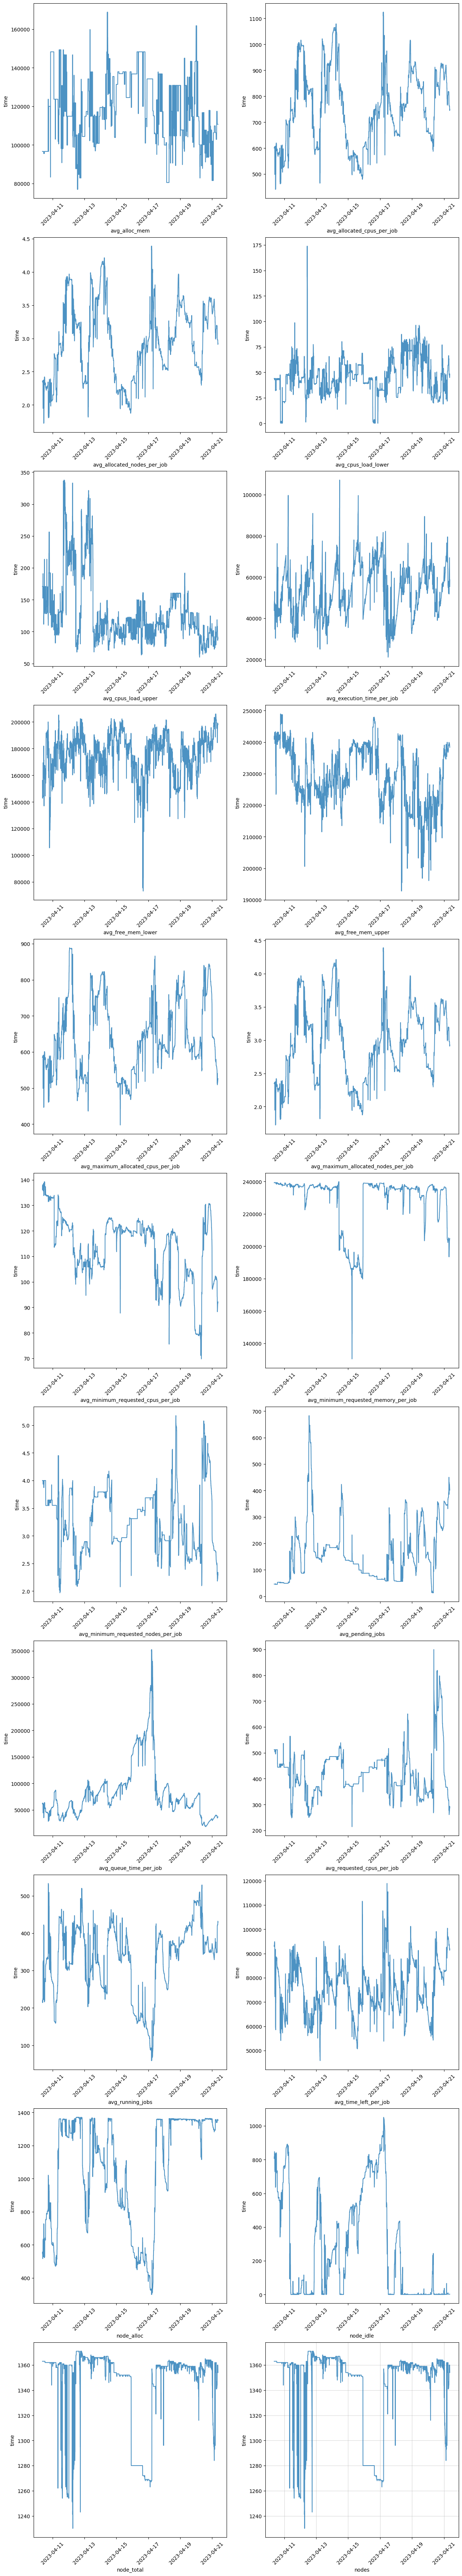

In [7]:
features = medium_df.columns
fig, axes = plt.subplots(11, 2, figsize=(15, 90))
row = 0
col = 0
for feature in medium_df.columns:
    axes[row, col].plot(medium_df.index, medium_df[feature],
        alpha=0.8
    )
    plt.grid(alpha=0.5)
    axes[row, col].tick_params(axis='x', rotation=45)
    axes[row, col].set(xlabel=feature, ylabel='time')
    col = col + 1
    if col % 2 == 0:
        col = 0
        row = row + 1

4- Histograms for feature value distribution

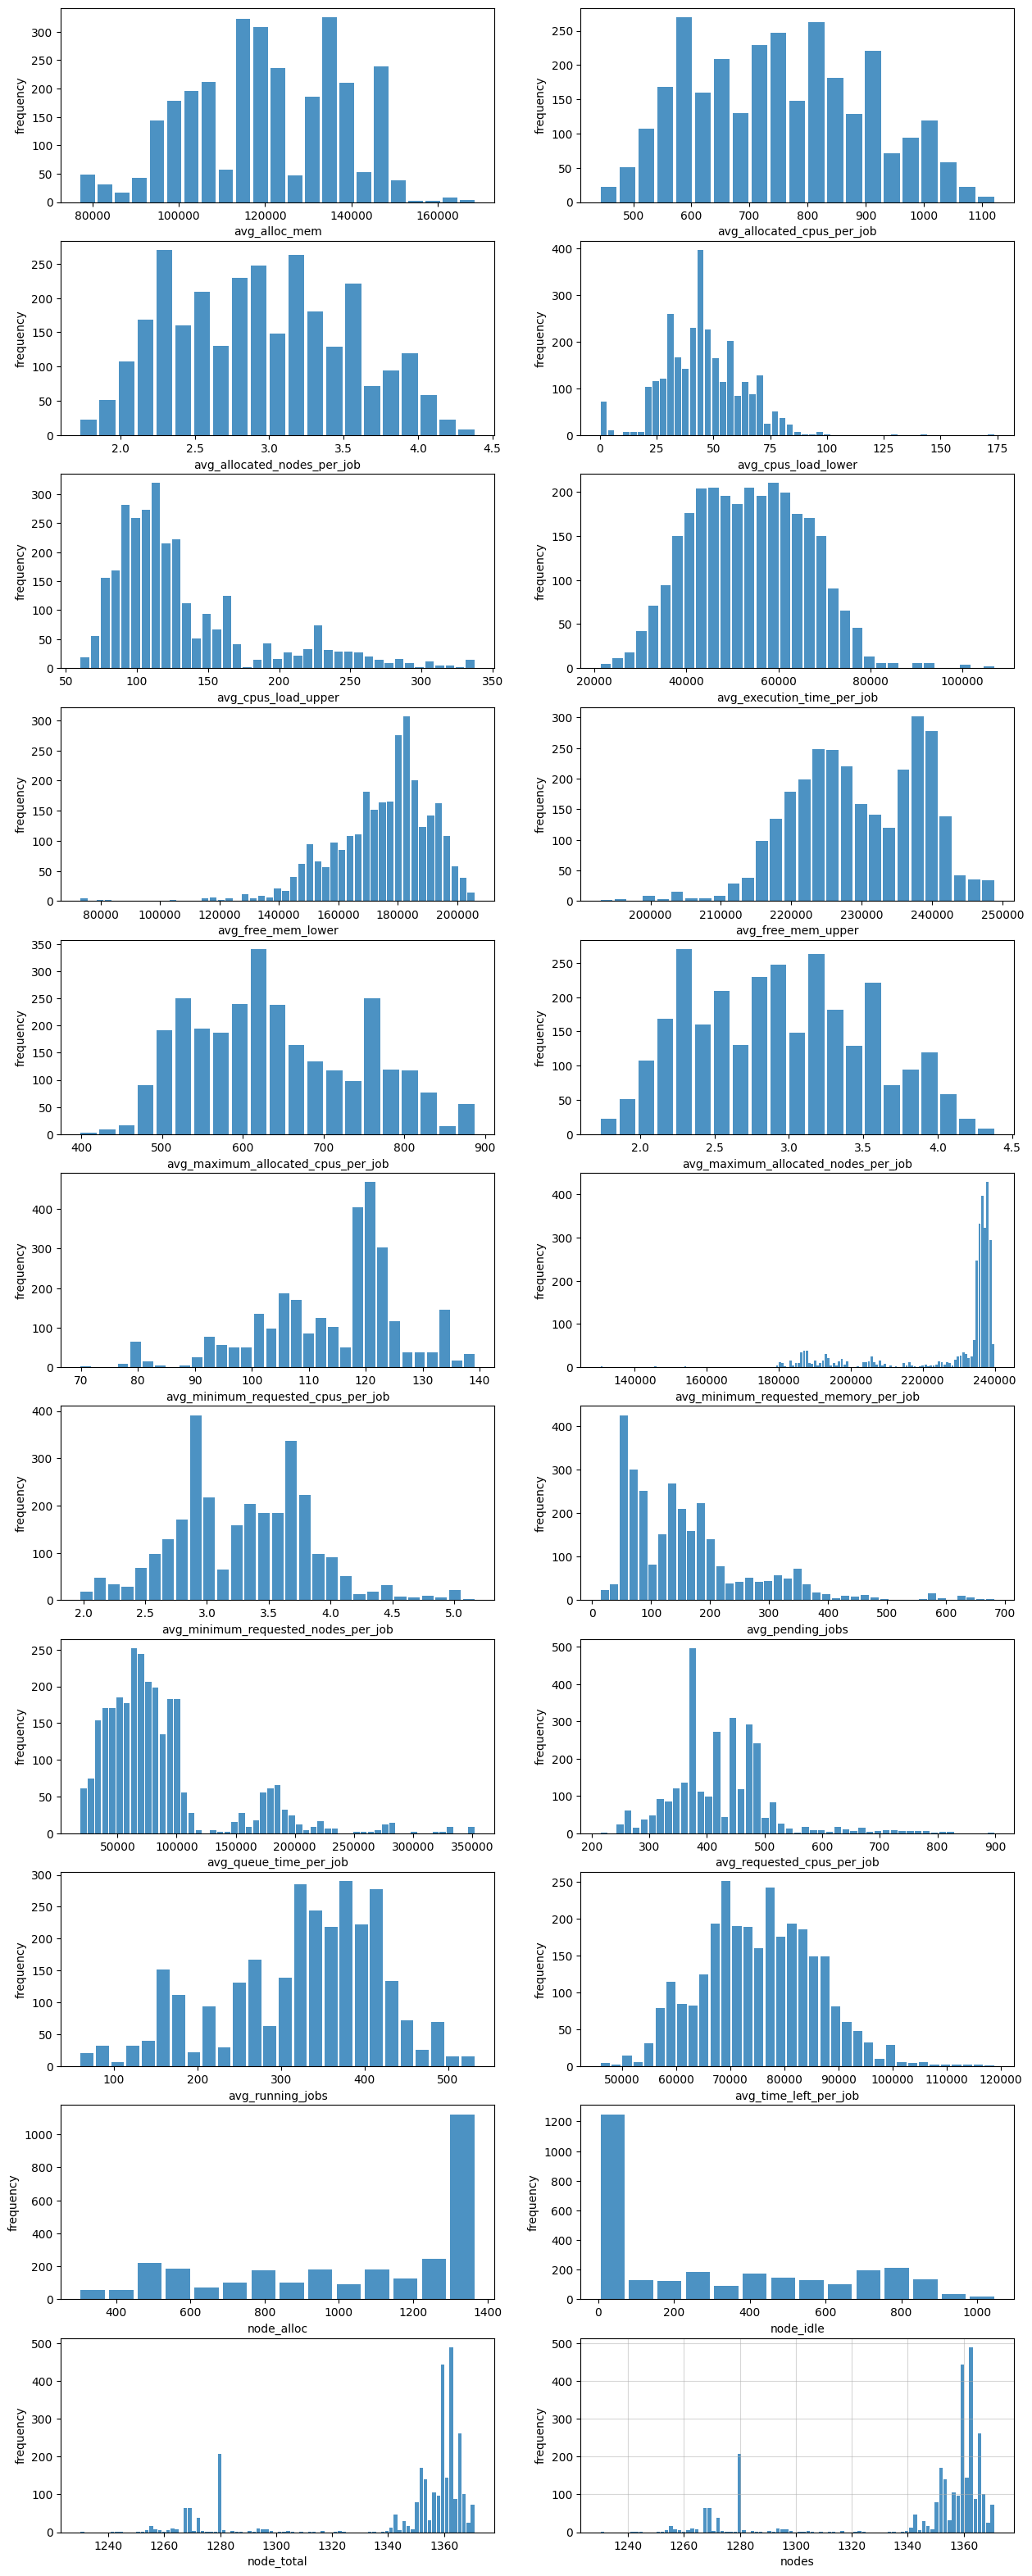

In [8]:
fig, axes = plt.subplots(11, 2, figsize=(15, 40))
row = 0
col = 0
for feature in medium_df.columns:
    n, bins, patches = axes[row, col].hist(
        x=medium_df[feature], bins='auto',
        alpha=0.8, rwidth=0.85
    )
    plt.grid(alpha=0.5)
    axes[row, col].set(xlabel=feature, ylabel='frequency')
    col = col + 1
    if col % 2 == 0:
        col = 0
        row = row + 1

Analysis of variance distribution of features with boxplot
It looks there are two groups of features, one with low variance, another one with large variance.
It the large variance group, some features shows outliers

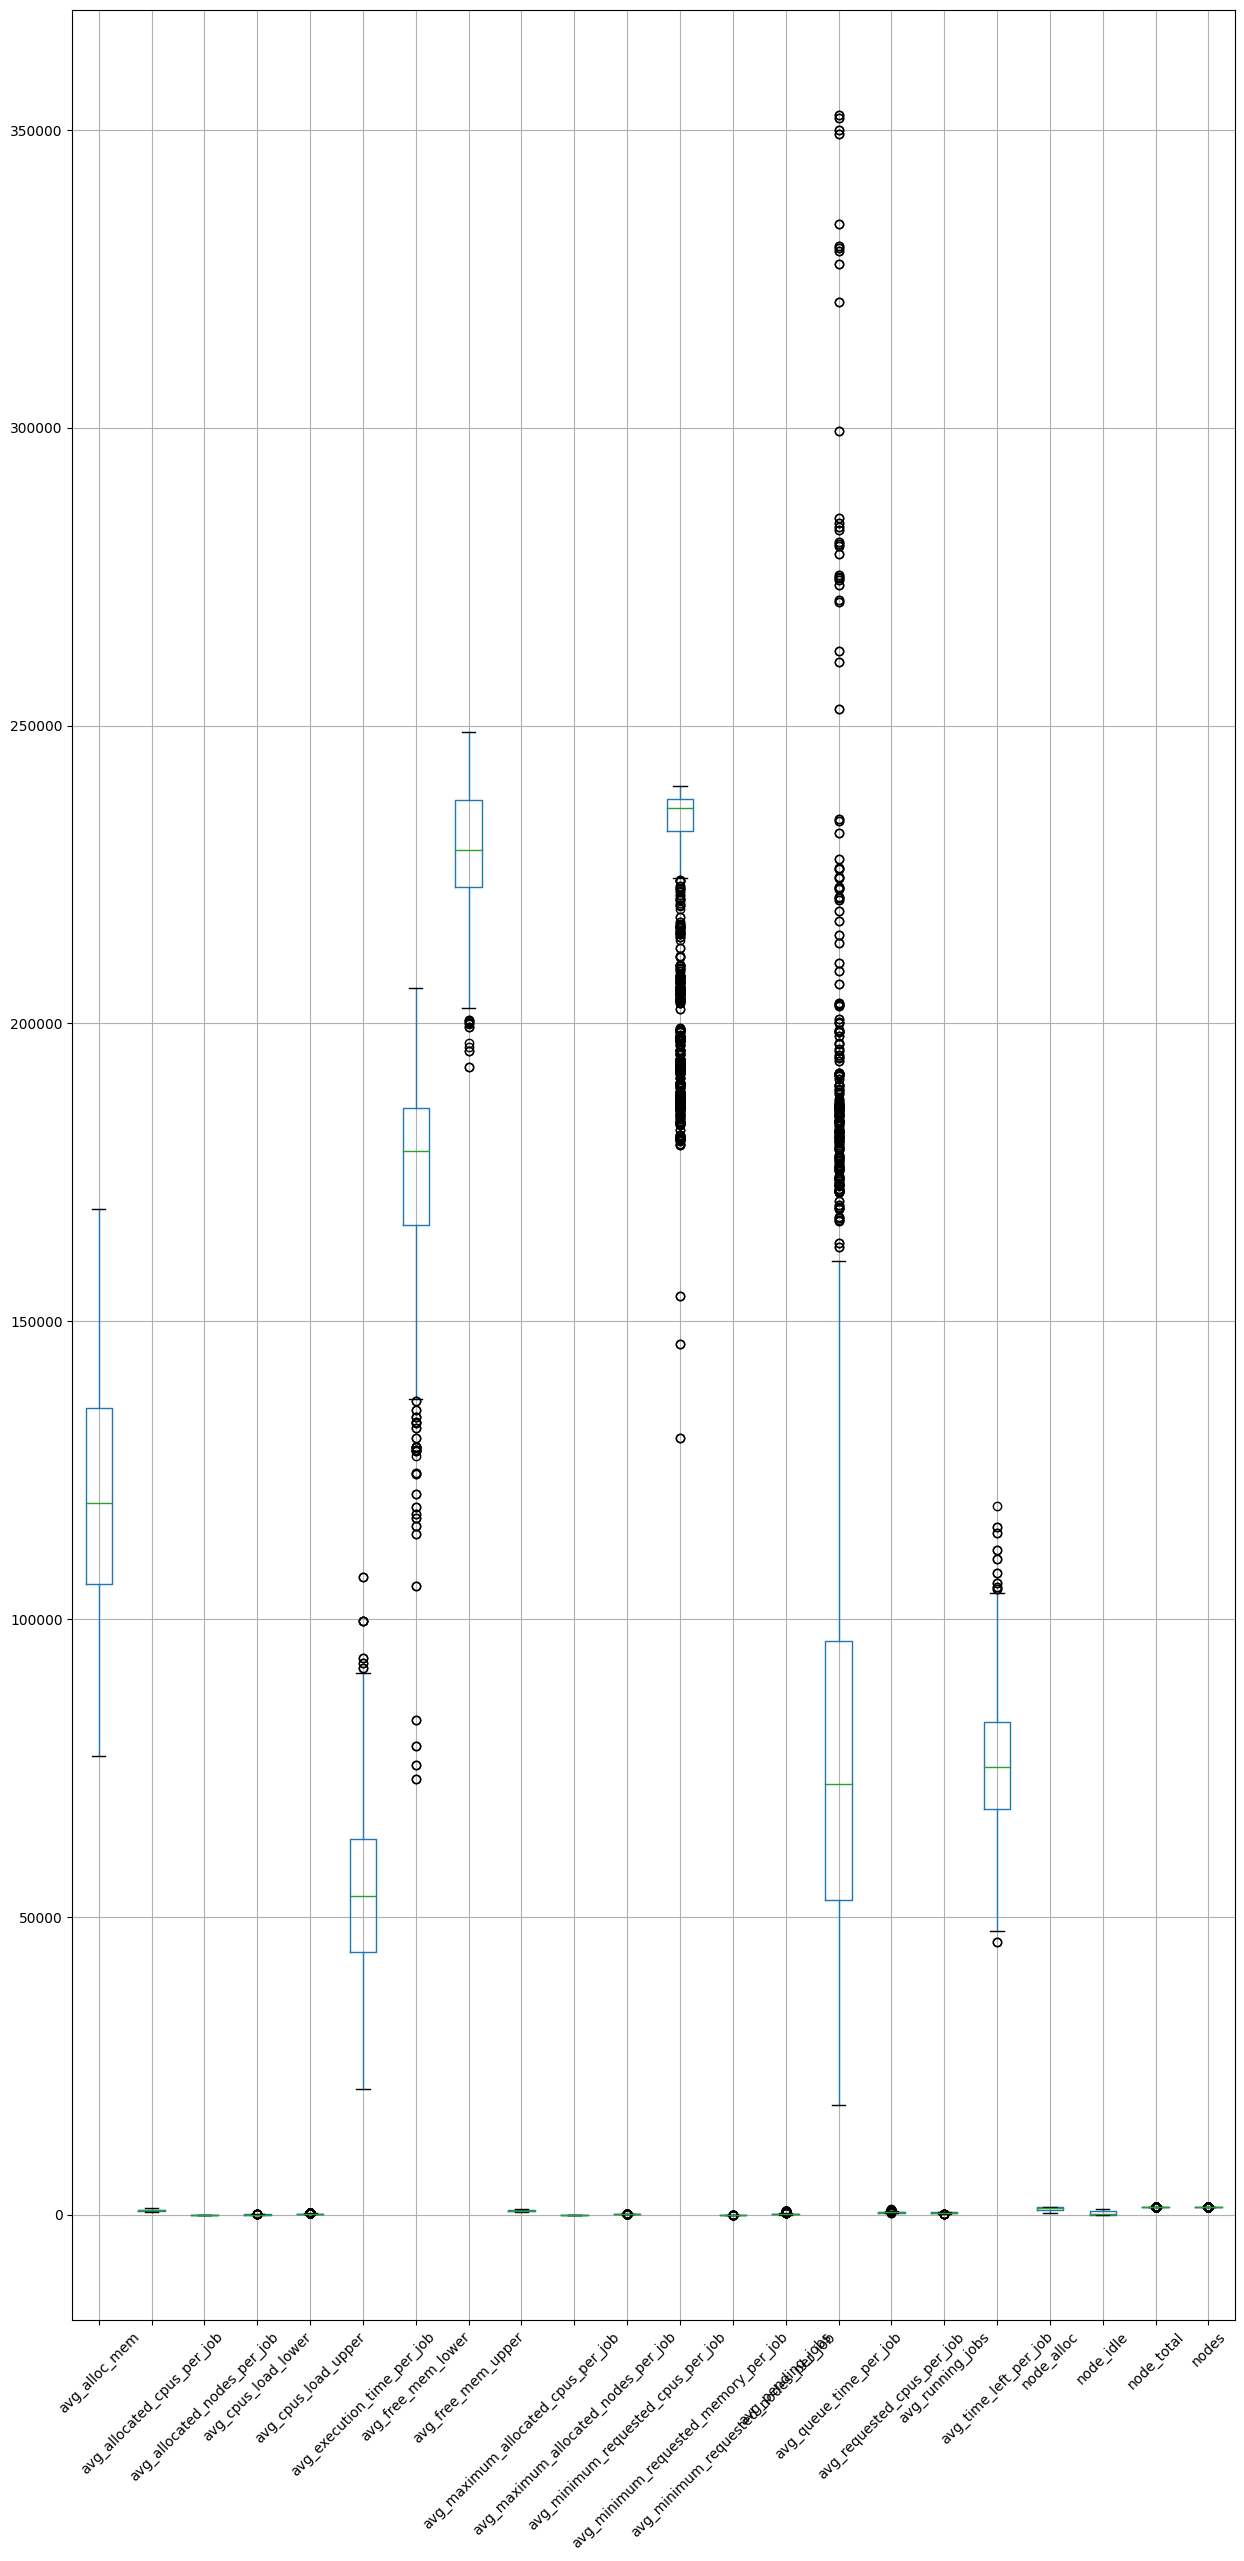

In [9]:
boxes = medium_df.boxplot(return_type='axes', figsize=(15, 30), rot=45)

6- Covariance between features
Correlation matrix computed by pandas

[Text(0, 0, 'avg_alloc_mem'),
 Text(0, 1, 'avg_allocated_cpus_per_job'),
 Text(0, 2, 'avg_allocated_nodes_per_job'),
 Text(0, 3, 'avg_cpus_load_lower'),
 Text(0, 4, 'avg_cpus_load_upper'),
 Text(0, 5, 'avg_execution_time_per_job'),
 Text(0, 6, 'avg_free_mem_lower'),
 Text(0, 7, 'avg_free_mem_upper'),
 Text(0, 8, 'avg_maximum_allocated_cpus_per_job'),
 Text(0, 9, 'avg_maximum_allocated_nodes_per_job'),
 Text(0, 10, 'avg_minimum_requested_cpus_per_job'),
 Text(0, 11, 'avg_minimum_requested_memory_per_job'),
 Text(0, 12, 'avg_minimum_requested_nodes_per_job'),
 Text(0, 13, 'avg_pending_jobs'),
 Text(0, 14, 'avg_queue_time_per_job'),
 Text(0, 15, 'avg_requested_cpus_per_job'),
 Text(0, 16, 'avg_running_jobs'),
 Text(0, 17, 'avg_time_left_per_job'),
 Text(0, 18, 'node_alloc'),
 Text(0, 19, 'node_idle'),
 Text(0, 20, 'node_total'),
 Text(0, 21, 'nodes')]

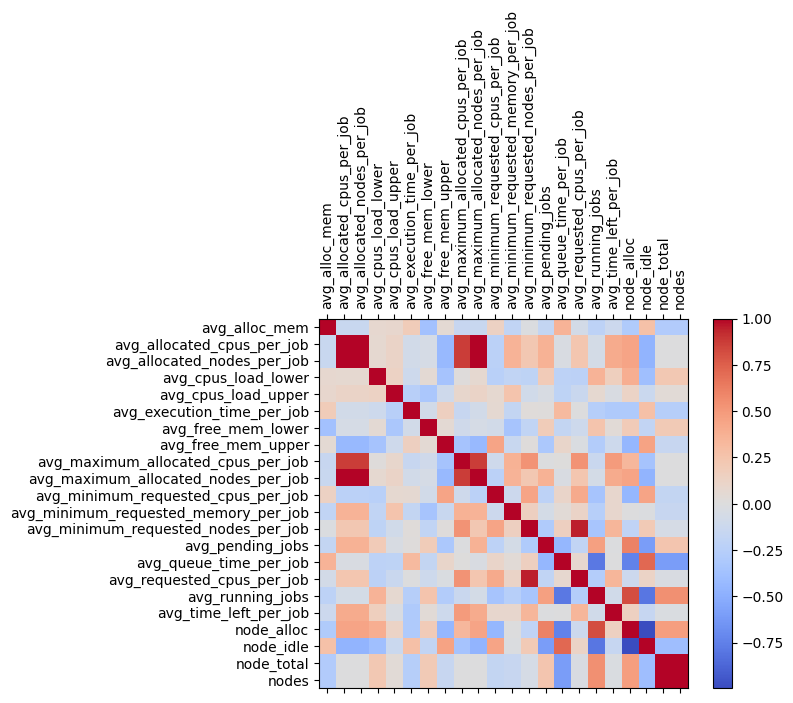

In [10]:
correlation_matrix = medium_df.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cmf = ax.matshow(correlation_matrix, cmap='coolwarm')
fig.colorbar(cmf)
plt.xticks(rotation=90)
xaxis = np.arange(len(features))
ax.set_xticks(xaxis)
ax.set_yticks(xaxis)
ax.set_xticklabels(features)
ax.set_yticklabels(features)

Correlation matrix computed by numpy (covariance matrix, Pearson)

[Text(0, 0, 'avg_alloc_mem'),
 Text(0, 1, 'avg_allocated_cpus_per_job'),
 Text(0, 2, 'avg_allocated_nodes_per_job'),
 Text(0, 3, 'avg_cpus_load_lower'),
 Text(0, 4, 'avg_cpus_load_upper'),
 Text(0, 5, 'avg_execution_time_per_job'),
 Text(0, 6, 'avg_free_mem_lower'),
 Text(0, 7, 'avg_free_mem_upper'),
 Text(0, 8, 'avg_maximum_allocated_cpus_per_job'),
 Text(0, 9, 'avg_maximum_allocated_nodes_per_job'),
 Text(0, 10, 'avg_minimum_requested_cpus_per_job'),
 Text(0, 11, 'avg_minimum_requested_memory_per_job'),
 Text(0, 12, 'avg_minimum_requested_nodes_per_job'),
 Text(0, 13, 'avg_pending_jobs'),
 Text(0, 14, 'avg_queue_time_per_job'),
 Text(0, 15, 'avg_requested_cpus_per_job'),
 Text(0, 16, 'avg_running_jobs'),
 Text(0, 17, 'avg_time_left_per_job'),
 Text(0, 18, 'node_alloc'),
 Text(0, 19, 'node_idle'),
 Text(0, 20, 'node_total'),
 Text(0, 21, 'nodes')]

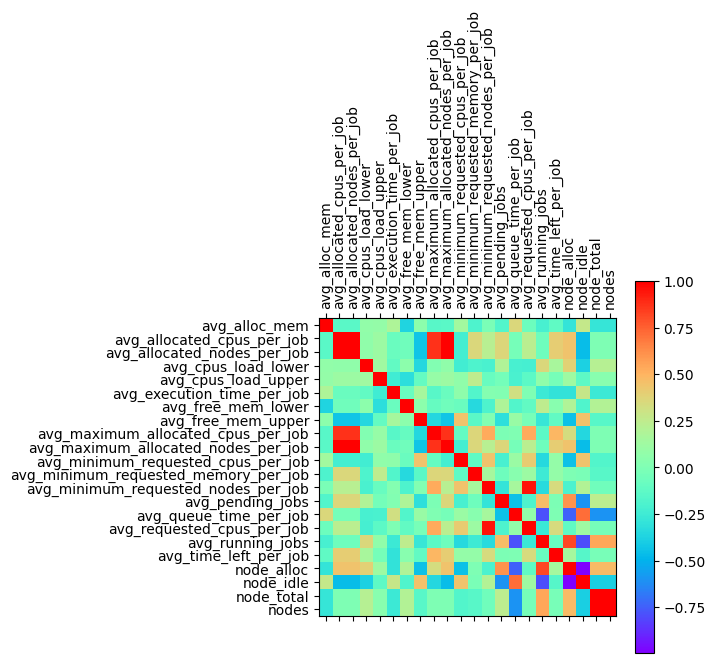

In [11]:
cov_data = np.corrcoef(medium_df.T)
img = plt.matshow(cov_data, cmap=plt.cm.rainbow)
fig.colorbar(img)
#plt.xticks(rotation=90)
#fig.autofmt_xdate(rotation=45)
xaxis = np.arange(len(features))
img.axes.set_xticks(xaxis)
img.axes.set_yticks(xaxis)
img.axes.set_xticklabels(features, rotation = 90)
img.axes.set_yticklabels(features)

Dimensionality reduction
Target: averaged_queue_time_per_job

PCA: Principal component analysis

In [12]:
from sklearn.decomposition import PCA
pca_2c = PCA(n_components=2)
X_pca_2c = pca_2c.fit_transform(medium_df)
X_pca_2c.shape

(2907, 2)

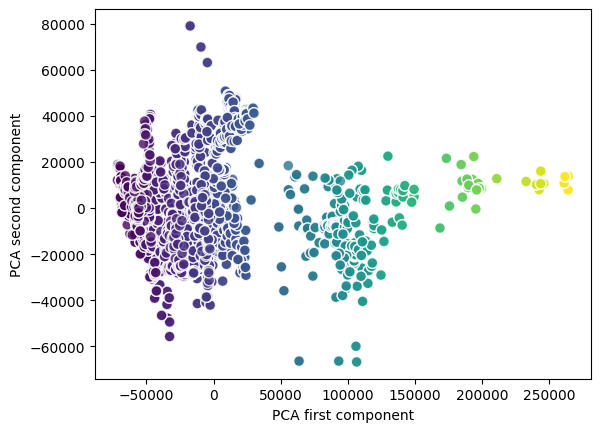

0.8135163784565945

In [13]:
plt.scatter(X_pca_2c[:,0], X_pca_2c[:,1], c=medium_df['avg_queue_time_per_job'], alpha=0.8,
    s=60, marker='o', edgecolors='white')
plt.xlabel("PCA first component")
plt.ylabel("PCA second component")
plt.show()
pca_2c.explained_variance_ratio_.sum()

In [14]:
pca_3c = PCA(n_components=3)
X_pca_3c = pca_3c.fit_transform(medium_df)
X_pca_3c.shape

(2907, 3)

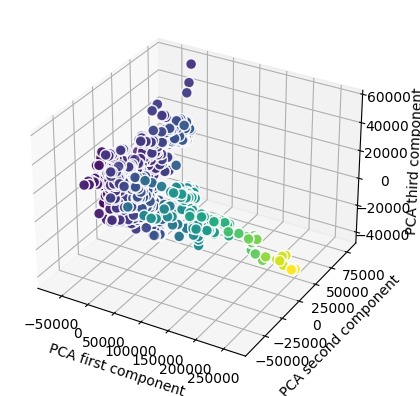

In [15]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X_pca_3c[:,0], X_pca_3c[:,1], X_pca_3c[:,2], c=medium_df['avg_queue_time_per_job'], alpha=0.8,
    s=60, marker='o', edgecolors='white')
ax.set_xlabel('PCA first component')
ax.set_ylabel('PCA second component')
ax.set_zlabel('PCA third component')
plt.show()

In above 2D and 3D scatter plots we can see how the average job queue_time mostly scales with the first PCA component

We can determine the optimal number of principal components. With n=6 we get 0.98 of total variance, with n=7, the 0.9999

First computation, iterating over an increasing number of components (up to the number of features)

In [16]:
for n in range(1,len(features)):
    pca_nc = PCA(n_components=n)
    X_pca_nc = pca_nc.fit_transform(medium_df)
    print ('n={}, variance_ratio_sum: {}'.format(n, pca_nc.explained_variance_ratio_.sum()))

n=1, variance_ratio_sum: 0.7228795341705985
n=2, variance_ratio_sum: 0.813516378456595
n=3, variance_ratio_sum: 0.895786328591874
n=4, variance_ratio_sum: 0.9349982717491834
n=5, variance_ratio_sum: 0.9613744153076306
n=6, variance_ratio_sum: 0.9811910641038721
n=7, variance_ratio_sum: 0.9999751890526739
n=8, variance_ratio_sum: 0.9999923540634528
n=9, variance_ratio_sum: 0.9999957910581312
n=10, variance_ratio_sum: 0.9999978072097726
n=11, variance_ratio_sum: 0.9999989090332625
n=12, variance_ratio_sum: 0.9999993737451552
n=13, variance_ratio_sum: 0.9999997388119546
n=14, variance_ratio_sum: 0.9999999088257066
n=15, variance_ratio_sum: 0.9999999536261739
n=16, variance_ratio_sum: 0.999999984262274
n=17, variance_ratio_sum: 0.9999999999946779
n=18, variance_ratio_sum: 1.0000000000000002
n=19, variance_ratio_sum: 1.0000000000000002
n=20, variance_ratio_sum: 1.0000000000000002
n=21, variance_ratio_sum: 1.0000000000000002


Second computation, requesting to obtain 0.99 total variance
Similarly, it determines 7 pca components as optimal

In [17]:
pca = PCA(n_components=0.99)
X_pca = pca.fit_transform(medium_df)
pca.explained_variance_ratio_.sum(), X_pca.shape

(0.9999751890526745, (2907, 7))

Third computation uses a randomized SVD algorithm, intended to speed up computation on large dataset
Similar results are obtained, but much faster for large datasets

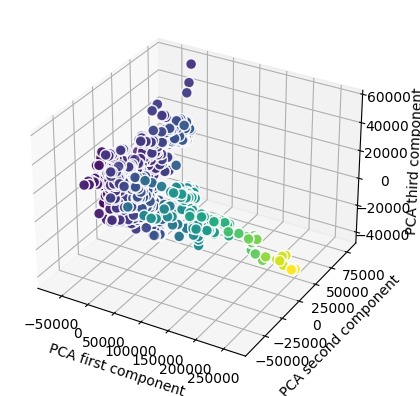

(0.9999751890526745, (2907, 7))

In [18]:
pca_7c = PCA(svd_solver='randomized', n_components=7)
X_pca_7c = pca_7c.fit_transform(medium_df)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X_pca_7c[:,0], X_pca_7c[:,1], X_pca_7c[:,2], c=medium_df['avg_queue_time_per_job'], alpha=0.8,
    s=60, marker='o', edgecolors='white')
ax.set_xlabel('PCA first component')
ax.set_ylabel('PCA second component')
ax.set_zlabel('PCA third component')
plt.show()
pca.explained_variance_ratio_.sum(), X_pca_7c.shape

LFA: Latent factor analysis
Obtain another non-orthogonal proyection of features to reduce dimensionality 

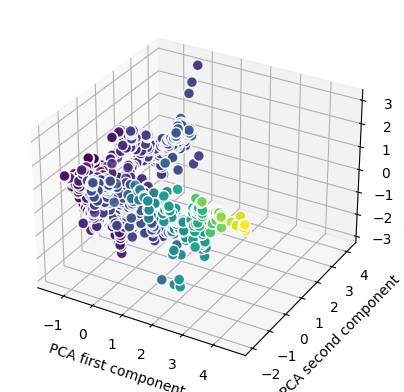

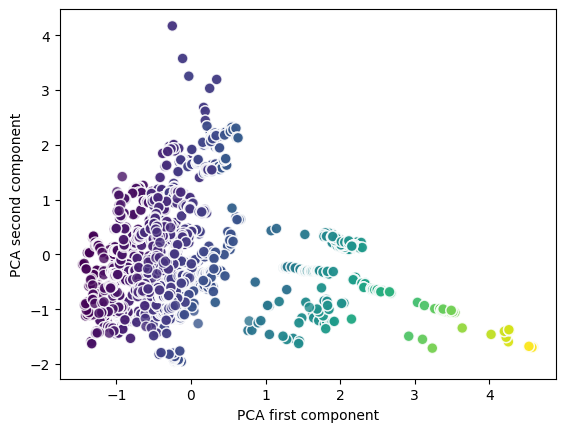

In [19]:
from sklearn.decomposition import FactorAnalysis
fa_7c = FactorAnalysis(n_components=7)
X_fa_7c = fa_7c.fit_transform(medium_df)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X_fa_7c[:,0], X_fa_7c[:,1], X_fa_7c[:,2], c=medium_df['avg_queue_time_per_job'], alpha=0.8,
    s=60, marker='o', edgecolors='white')
ax.set_xlabel('PCA first component')
ax.set_ylabel('PCA second component')
ax.set_zlabel('PCA third component')
plt.show()

plt.scatter(X_fa_7c[:,0], X_fa_7c[:,1], c=medium_df['avg_queue_time_per_job'], alpha=0.8,
    s=60, marker='o', edgecolors='white')
plt.xlabel("PCA first component")
plt.ylabel("PCA second component")
plt.show()

Linear Discriminant Analysys
It requires categorical labels

In [69]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import math
X_features = features.drop('avg_queue_time_per_job')
target = features == 'avg_queue_time_per_job'
y_features = features[target]
X = medium_df[X_features].to_numpy()
y = medium_df[y_features]
step = math.floor((y.max() - y.min())/10)
bins = range(math.floor(y.min()), math.ceil(y.max()), step)
y = pd.cut(x=medium_df[y_features].to_numpy().flatten(), bins=bins, labels=range(10))
y = y.fillna(method='pad')
lda_7c = LDA(n_components=7)
X_lda_7c = lda_7c.fit_transform(X, y)

/tmp/ipykernel_22590/3446104444.py:8: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  step = math.floor((y.max() - y.min())/10)
/tmp/ipykernel_22590/3446104444.py:9: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  bins = range(math.floor(y.min()), math.ceil(y.max()), step)


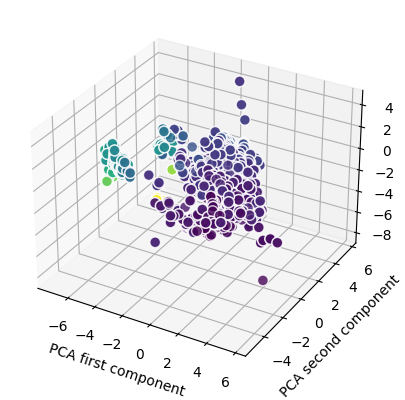

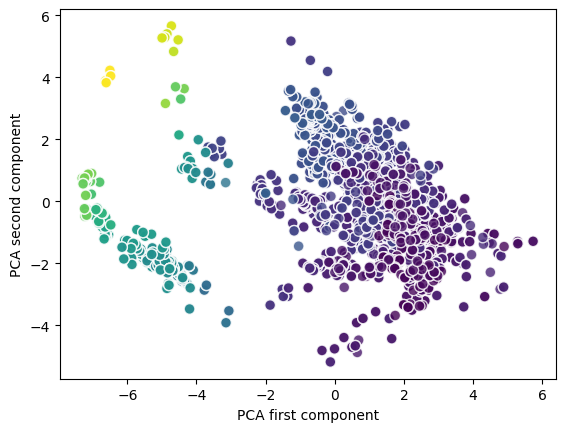

In [70]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X_lda_7c[:,0], X_lda_7c[:,1], X_lda_7c[:,2], c=medium_df['avg_queue_time_per_job'], alpha=0.8,
    s=60, marker='o', edgecolors='white')
ax.set_xlabel('PCA first component')
ax.set_ylabel('PCA second component')
ax.set_zlabel('PCA third component')
plt.show()

plt.scatter(X_lda_7c[:,0], X_lda_7c[:,1], c=medium_df['avg_queue_time_per_job'], alpha=0.8,
    s=60, marker='o', edgecolors='white')
plt.xlabel("PCA first component")
plt.ylabel("PCA second component")
plt.show()

In [ ]:

import math
y = medium_df[y_features]
step = math.floor((y.max() - y.min())/10)
bins = range(math.floor(y.min()), math.ceil(y.max()), step)
y2 = pd.cut(x=medium_df[y_features].to_numpy().flatten(), bins=bins, labels=range(10))
y3 = y2.fillna('pad')